<a href="https://colab.research.google.com/github/gabrielalastra/PYTHON/blob/master/analyis_cleaning3_sttscs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#lendo arquivos do bit e eth
DataFr = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/btc-eth-prices-outliers.csv',
                     index_col=0,
                     parse_dates=True
)

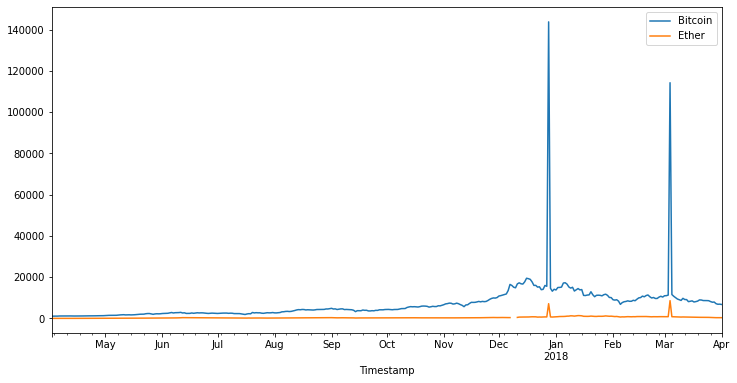

In [3]:
DataFr.plot(figsize=(12,6))

In [4]:
DataFr.describe()

,Bitcoin,Ether
count,365.000000,362.000000
mean,6996.004022,469.247072
std,10186.586168,636.820105
min,1099.169125,42.310000
25%,2585.349186,238.525000
50%,4594.987850,308.825000
75%,9182.843333,657.502500
max,143805.816667,8648.300000


alguns valores invalidos entre 01 de dezembro e 01 janeiro para a cryptomoeda Ether


---





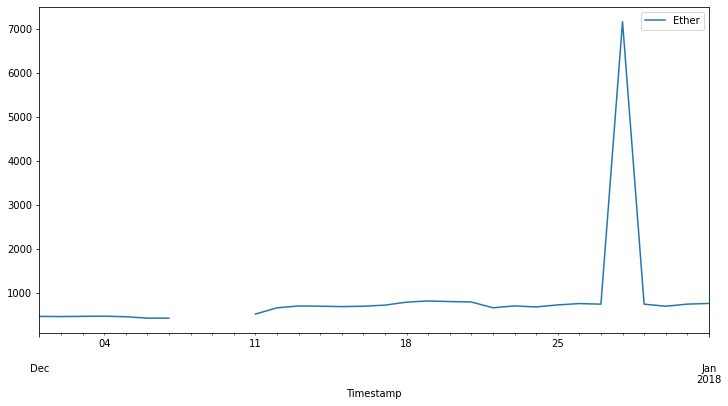

In [ ]:
DataFr.loc['2017-12':'2018-01-01'].plot(y='Ether', figsize=(12,6))

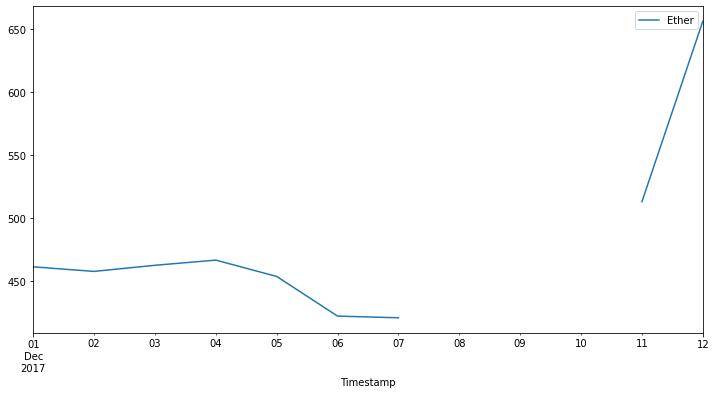

In [ ]:
#aproximando mais do local, entre os dias 04 e 12 de dez
DataFr.loc['2017-12-01': '2017-12-12'].plot(y='Ether', figsize=(12,6))

In [5]:
#separando esse trecho 
DataFr_na = DataFr.loc['2017-12-04' : '2017-12-12']

In [ ]:
DataFr_na['Ether'].isna().value_counts()

False    6
True     3
Name: Ether, dtype: int64

In [ ]:
DataFr_na.loc[DataFr_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [ ]:
#ver os valores proximos ao NaN 
DataFr_na

,Bitcoin,Ether
Timestamp,,
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [6]:
#oq faremos com os 3 valores que faltam?
#podemos preencher com o ultimo valor e admitir que o preco ficou estavel
DataFr.loc['2017-12-04' : '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-04,11584.830000,466.93
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [7]:
#parece rasoavel
DataFr.fillna(method='bfill', inplace=True)

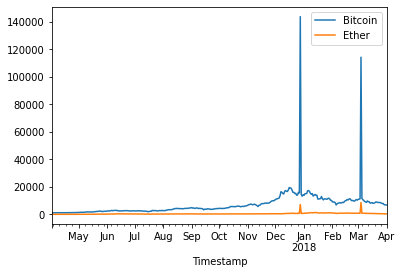

In [ ]:
DataFr.plot()

tem dois picos que sao muito distoantes

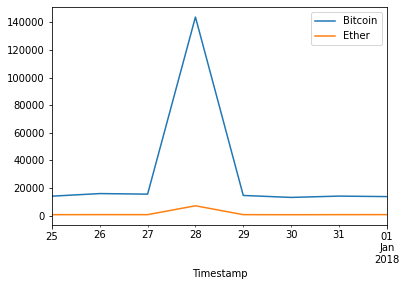

In [ ]:
DataFr['2017-12-25' : '2018-01-01'].plot()

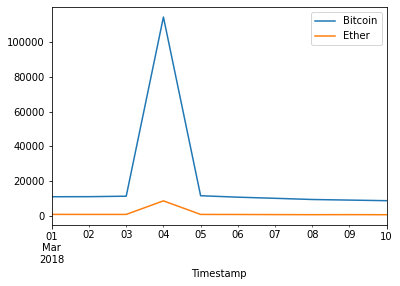

In [ ]:
DataFr['2018-03-01': '2018-03-10'].plot()

In [8]:
DataFr_cleaned = DataFr.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

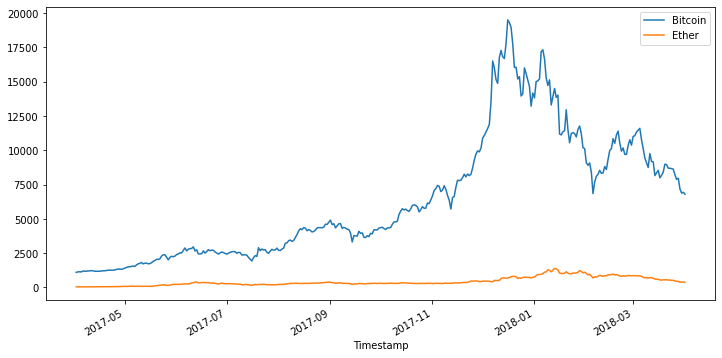

In [9]:
DataFr_cleaned.plot(figsize=(12,6))

In [ ]:
#media aritmetica
print('a media antes de verificar os dados é \n{}'. format(DataFr.mean()))

print('\n\na media com os dados verificados é \n{}'. format(DataFr_cleaned.mean()))

a media antes de verificar os dados é 
Bitcoin    6996.004022
Ether       469.609068
dtype: float64


a media com os dados verificados é 
Bitcoin    6323.509186
Ether       428.628402
dtype: float64


In [10]:
#mediana
print('a mediana dos dados brutos é \n{}'.format(DataFr.median()))

print('\n\na mediana dos dados verificados é \n{}'.format(DataFr_cleaned.median()))

a mediana dos dados brutos é 
Bitcoin    4594.98785
Ether       309.49000
dtype: float64


a mediana dos dados verificados é 
Bitcoin    4580.38748
Ether       309.32000
dtype: float64


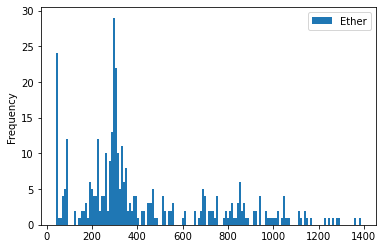

In [ ]:
#ver a distribuicao de valores
DataFr_cleaned.plot(kind='hist', y='Ether', bins=150) #mude os bins 

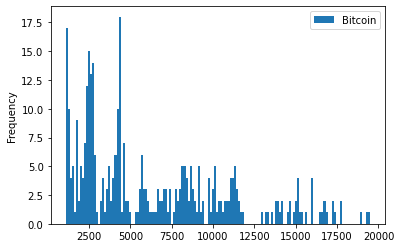

In [ ]:
DataFr_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

Text(0.5, 1.0, 'Ether')

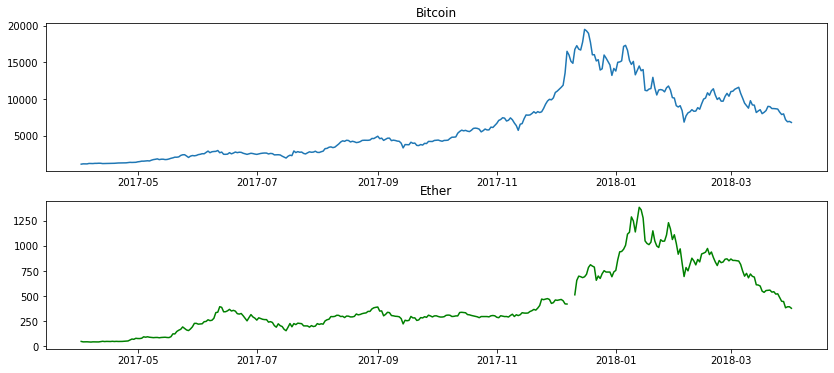

In [ ]:
fig = plt.figure(figsize=(14,6))

axx1= fig.add_subplot(2,1,1)
plt.plot(DataFr_cleaned['Bitcoin'])
plt.title('Bitcoin')

axx2 = fig.add_subplot(2,1,2)
plt.plot(DataFr_cleaned['Ether'], c='green')
plt.title('Ether')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


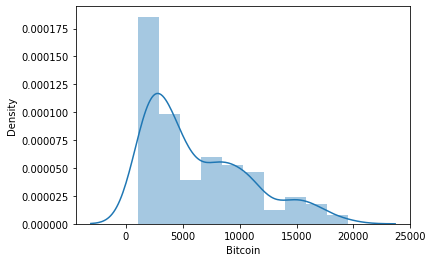

In [ ]:
sns.distplot(DataFr_cleaned['Bitcoin'],bins=10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


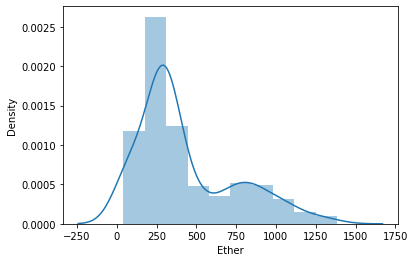

In [ ]:
sns.distplot(DataFr_cleaned['Ether'], bins=10)

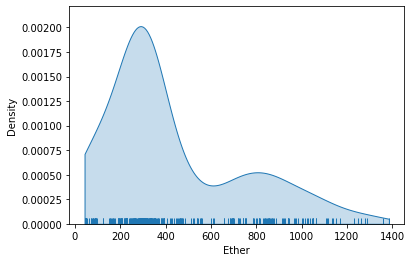

In [ ]:
#Estimativa de densidade de Kernel
sns.kdeplot(DataFr_cleaned['Ether'], shade=True, cut=0)
sns.rugplot(DataFr_cleaned['Ether'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


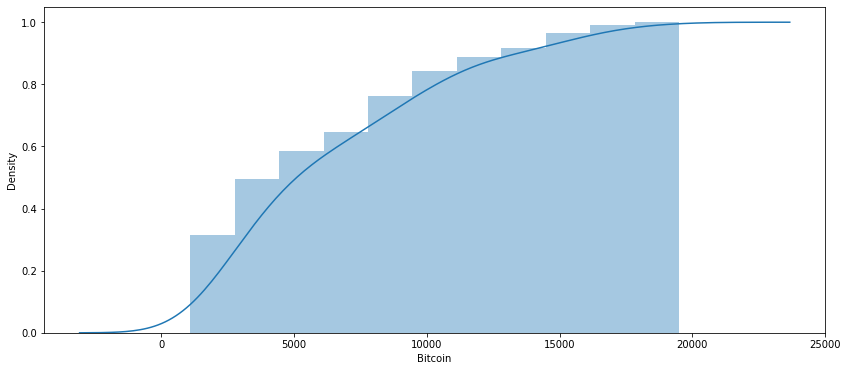

In [ ]:
#quantas amostras estao a baixo da kde
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(DataFr_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


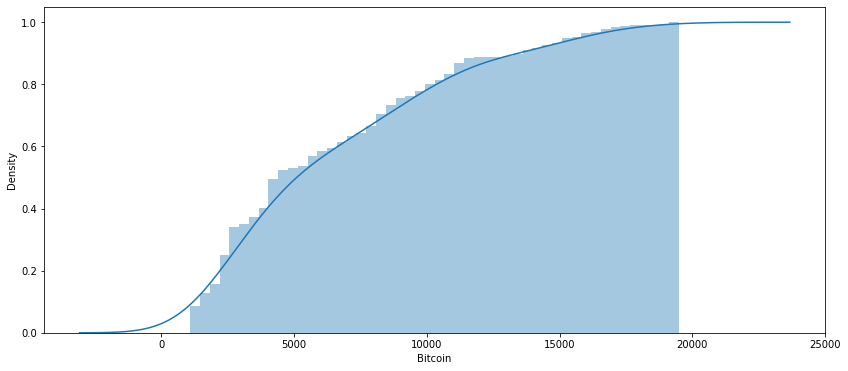

In [ ]:
#com mais bins
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(DataFr_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

Distribuições bivariadas

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


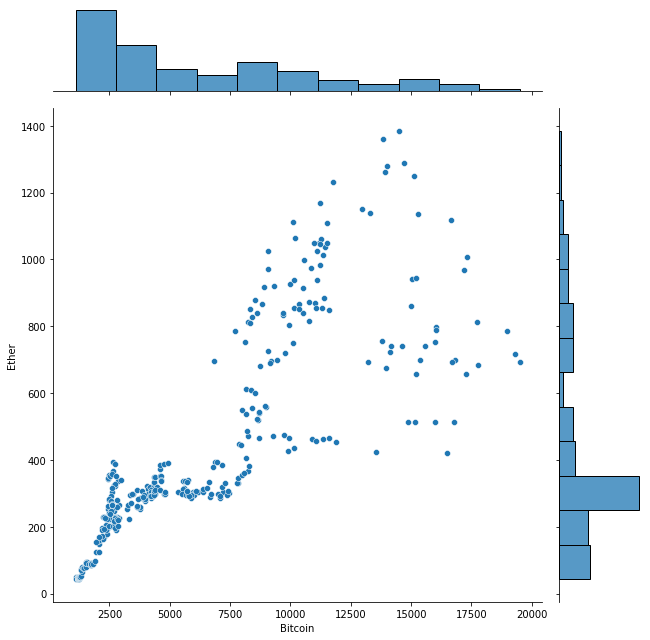

In [ ]:
#grafico de dispersao + x, y
sns.jointplot(x='Bitcoin', y='Ether', data=DataFr_cleaned, size=9)

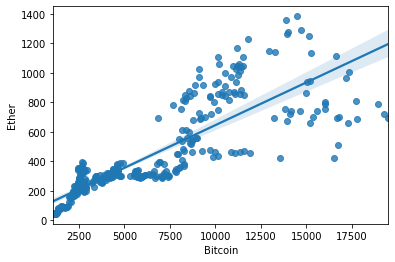

In [ ]:
sns.regplot(x='Bitcoin', y='Ether', data=DataFr_cleaned)

#Quantil, quartil e porcento
quantil = 0.25
quartil = 1o.
porcentagem = 25%

In [ ]:
DataFr_cleaned['Bitcoin'].quantile(.25)

2573.739924107143

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


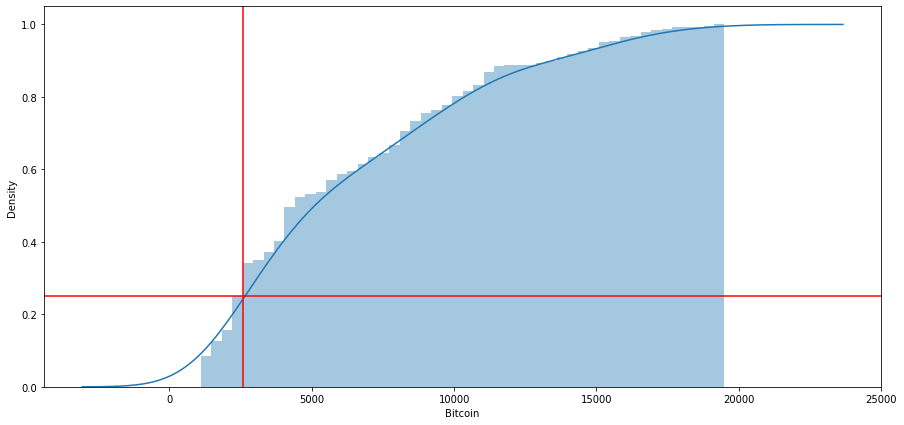

In [ ]:
#visualizando
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(DataFr_cleaned['Bitcoin'], bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.25, color='red')
ax.axvline(DataFr_cleaned['Bitcoin'].quantile(.25), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


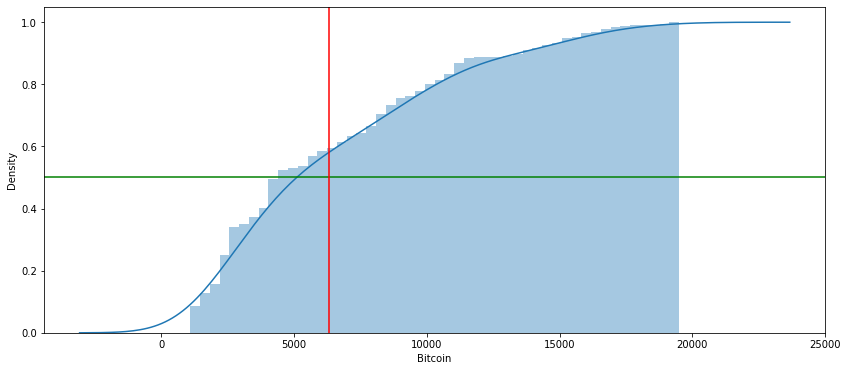

In [ ]:
#visualizando o ponto da media aritmetica
fig, ax = plt.subplots(figsize=(14,6))
sns.distplot(DataFr_cleaned['Bitcoin'], ax=ax, bins=50,
             kde_kws=dict(cumulative=True), #teste tirar o kws
             hist_kws=dict(cumulative=True))
ax.axhline(0.5, color='green')
ax.axvline(DataFr_cleaned['Bitcoin'].mean(), color='red')

Dispersão

In [ ]:
#Amplitude = max-min, muda mt com e sem os outliers
print('com os dados brutos, a amplitude é de \n{}'.format(DataFr['Bitcoin'].max() - DataFr['Bitcoin'].min()))

#o segundo faz mais sentido, como tem uma max em 20k
print('\n\ncom os dados verificados, a nova amplitude é \n{}'.format(DataFr_cleaned['Bitcoin'].max() - DataFr_cleaned['Bitcoin'].min()))

com os dados brutos, a amplitude é de 
142706.6475416667


com os dados verificados, a nova amplitude é 
18399.514208333334


In [ ]:
#variancia
DataFr['Bitcoin'].var()

103766537.75278114

In [ ]:
DataFr_cleaned['Bitcoin'].var()

20374008.23605083

In [ ]:
#desvio padrao
DataFr['Bitcoin'].std()

10186.586167739471

In [ ]:
DataFr_cleaned['Bitcoin'].std()

4513.757662530282

Amplitude entre quartis (Q3-Q1)

In [14]:
DataFr_cleaned['Bitcoin'].quantile(.75) - DataFr_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

Análise de valores que parecem inválidos

In [17]:
#desvio padra e Z scoures
up_lim = DataFr['Bitcoin'].mean() +2* DataFr['Bitcoin'].std()
lo_lim = DataFr['Bitcoin'].mean() -2* DataFr['Bitcoin'].std()

print('Lim Max {}'.format(up_lim))
print('Lim Min {}'.format(lo_lim))

Lim Max 27369.17635730168
Lim Min -13377.168313656206


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


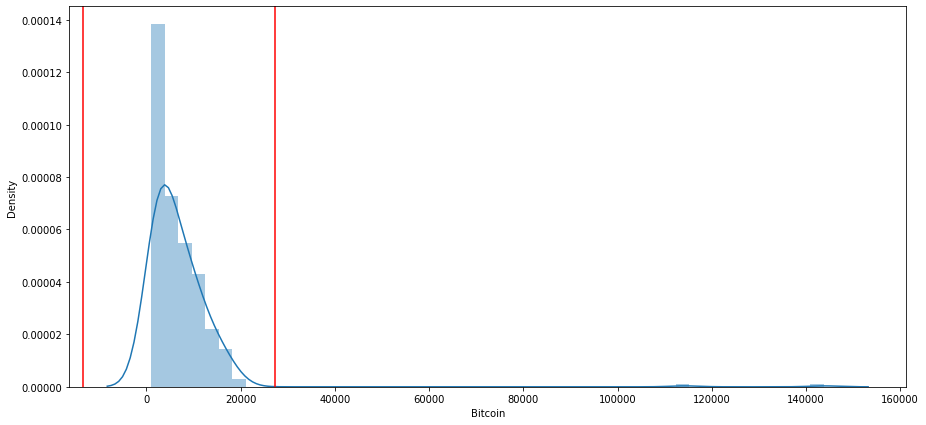

In [20]:
fig, ax = plt.subplots(figsize=(15,7))
sns.distplot(DataFr['Bitcoin'], ax=ax)
ax.axvline(lo_lim, color='red')
ax.axvline(up_lim, c='red')

parece uma medição razoável, o limite negativo não faz muito sentido mas o lim maximo teve uma medida boa, qlqr valor acima de 27.369 é considerado inválido.

In [21]:
#se o desvio padrao for mt afetado pelos outliers, use o IQR
iqr = DataFr['Bitcoin'].quantile(.75) - DataFr['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [22]:
up_lim2 = DataFr['Bitcoin'].mean() +2*iqr
lo_lim2 = DataFr['Bitcoin'].mean() -2*iqr

print('Lim Max {}'.format(up_lim2))
print('Lim Min {}'.format(lo_lim2))

Lim Max 20190.99231706083
Lim Min -6198.984273415356


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


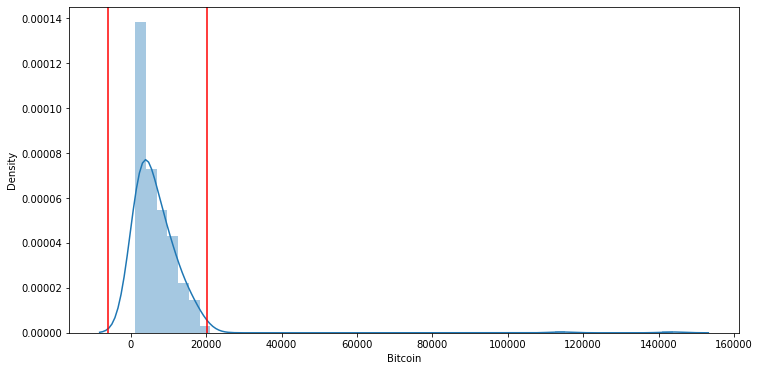

In [23]:
fig, ax = plt.subplots(figsize=(12,6))
sns.distplot(DataFr['Bitcoin'], ax=ax)
ax.axvline(lo_lim2, c='red')
ax.axvline(up_lim2, c='red')

observe que esse método é menos preciso, uma vez que alguns valores validos (20k) aparecem acima do limite superior.
Apesar disso, ainda é um bom indicador.

In [24]:
#limpando o banco de dados com o limite max via desvio padrao
up_limit = DataFr['Bitcoin'].mean() +2*DataFr['Bitcoin'].std()

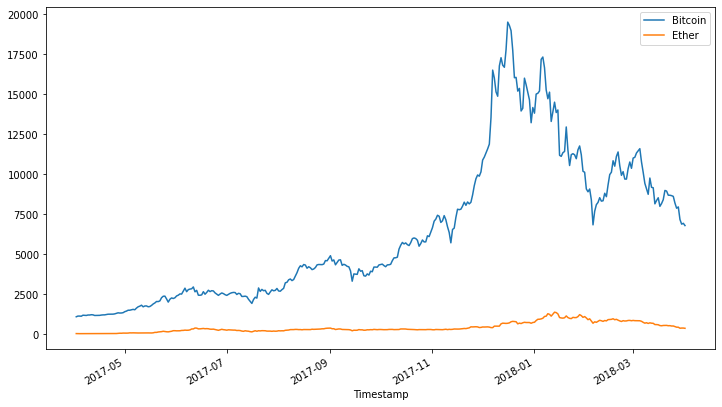

In [25]:
DataFr[DataFr['Bitcoin'] < up_limit].plot(figsize=(12,7))

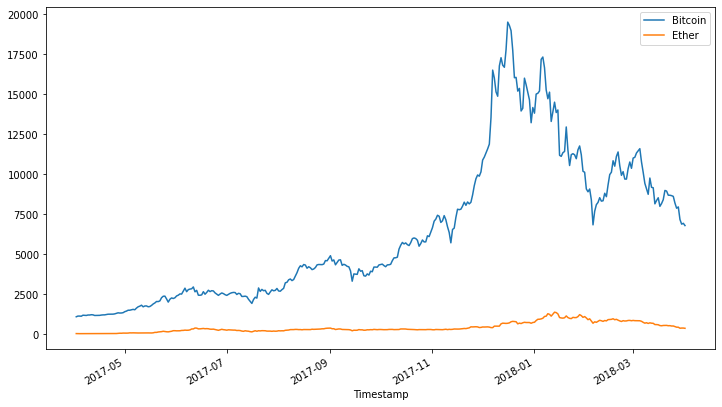

In [26]:
DataFr.drop(DataFr[DataFr['Bitcoin']> up_limit].index).plot(figsize=(12,7))